In [31]:
import os
import re
from shutil import copyfile
import random
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [32]:
try:
    cwd=os.getcwd()
    base_dir=os.path.join(cwd,'figtmp')
    training_dir=os.path.join(base_dir,'training')
    testing_dir=os.path.join(base_dir,'testing')
    training_dir_left=os.path.join(training_dir,'Left')
    training_dir_right=os.path.join(training_dir,'Right')
    training_dir_straight=os.path.join(training_dir,'Straight')
    testing_dir_left=os.path.join(testing_dir,'Left')
    testing_dir_right=os.path.join(testing_dir,'Right')
    testing_dir_straight=os.path.join(testing_dir,'Straight')
    os.mkdir(base_dir)
    os.mkdir(training_dir)
    os.mkdir(testing_dir)
    os.mkdir(training_dir_left)
    os.mkdir(training_dir_right)
    os.mkdir(training_dir_straight)
    os.mkdir(testing_dir_left)
    os.mkdir(testing_dir_right)
    os.mkdir(testing_dir_straight)
except OSError:
    pass

In [33]:
def image_preprocessing(image):
    height, _, _ = image.shape
    image = image[int(height/2):,:,:]  # remove top half of the image, as it is not relevant for lane following
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)  # Nvidia model said it is best to use YUV color space
    image = cv2.GaussianBlur(image, (3,3), 0)
    #image = cv2.resize(image, (200,66))
    return image

In [34]:
def rearrangement(PATH,SPLIT_SIZE):
    left=[]
    right=[]
    straight=[]
    figlist=os.listdir(PATH)
    for figname in figlist:
        fig=os.path.join(PATH,figname)
        val=re.findall(r'_(\d+)_',figname)
        val2=re.findall(r'_(\d+)\.',figname)
        if len(val)!=0 and len(val2)!=0:
            angle=val[0]
            speed=val2[0]
            if int(speed)!=0:
                if int(angle)<=70:
                    left.append(figname)
                elif int(angle)>=110:
                    right.append(figname)
                else:
                    straight.append(figname)
    print(len(left))
    print(len(right))
    print(len(straight))
    shuffled_left=random.sample(left,len(left))
    shuffled_right=random.sample(right,len(right))
    shuffled_straight=random.sample(straight,len(straight))
    training_left_length=int(len(left)*SPLIT_SIZE)
    testing_left_length=int(len(left)-training_left_length)
    training_right_length=int(len(right)*SPLIT_SIZE)
    testing_right_length=int(len(right)-training_right_length)
    training_straight_length=int(len(straight)*SPLIT_SIZE)
    testing_straight_length=int(len(straight)-training_straight_length)
    training_left=shuffled_left[0:training_left_length]
    testing_left=shuffled_left[:testing_left_length]
    training_right=shuffled_right[0:training_right_length]
    testing_right=shuffled_right[:testing_right_length]
    training_straight=shuffled_straight[0:training_straight_length]
    testing_straight=shuffled_straight[:testing_straight_length]
    for fig in training_left:
        original_image=plt.imread(os.path.join(PATH,fig))
        image=image_preprocessing(original_image)
        plt.axis('off')
        plt.imshow(image)
        plt.savefig(os.path.join(training_dir_left,fig),bbox_inches = 'tight')
        #copyfile(os.path.join(PATH,fig),os.path.join(training_dir_left,fig))
    for fig in training_right:
        original_image=plt.imread(os.path.join(PATH,fig))
        image=image_preprocessing(original_image)
        plt.axis('off')
        plt.imshow(image)
        plt.savefig(os.path.join(training_dir_right,fig),bbox_inches = 'tight')
        #copyfile(os.path.join(PATH,fig),os.path.join(training_dir_right,fig))
    for fig in training_straight:
        original_image=plt.imread(os.path.join(PATH,fig))
        image=image_preprocessing(original_image)
        plt.axis('off')
        plt.imshow(image)
        plt.savefig(os.path.join(training_dir_straight,fig),bbox_inches = 'tight')
        #copyfile(os.path.join(PATH,fig),os.path.join(training_dir_straight,fig))
    for fig in testing_left:
        original_image=plt.imread(os.path.join(PATH,fig))
        image=image_preprocessing(original_image)
        plt.axis('off')
        plt.imshow(image)
        plt.savefig(os.path.join(testing_dir_left,fig),bbox_inches = 'tight')
        #copyfile(os.path.join(PATH,fig),os.path.join(testing_dir_left,fig))
    for fig in testing_right:
        original_image=plt.imread(os.path.join(PATH,fig))
        image=image_preprocessing(original_image)
        plt.axis('off')
        plt.imshow(image)
        plt.savefig(os.path.join(testing_dir_right,fig),bbox_inches = 'tight')
        #copyfile(os.path.join(PATH,fig),os.path.join(testing_dir_right,fig))
    for fig in testing_straight:
        original_image=plt.imread(os.path.join(PATH,fig))
        image=image_preprocessing(original_image)
        plt.axis('off')
        plt.imshow(image)
        plt.savefig(os.path.join(testing_dir_straight,fig),bbox_inches = 'tight')
        #copyfile(os.path.join(PATH,fig),os.path.join(testing_dir_straight,fig))

23
1
42
0
26
72
23
1
37


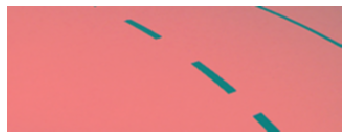

In [35]:
rearrangement(os.path.join(cwd,'Oval_Track/capture1'),0.9)
rearrangement(os.path.join(cwd,'Oval_Track/capture2'),0.9)
rearrangement(os.path.join(cwd,'Oval_Track/capture1/trial1'),0.9)